# About



This simulation aims at finding the equilibrium shape of an elastic sheet which is submitted to some constraints (displacements, forces) at the boundary. The elastic energy includes stretching and bending energies.

The objective is to simulate the formation of buckles, wrinkles, folds when the sheets in submitted to large deformation under compression or mild tension. The ultimate goal is to simulate the shape of a wide Mobius band but maybe easier systems maybe considered as intermediate easier step:

- Buckling of a flat sheet
- Helicoids, Wrinkles, and Loops in Twisted Ribbons
- Twist-Induced Snapping in a Bent Elastic Rod and Ribbon (optional)

For the simulation, we use Pymembrane.

Before running the script, you may need to activate the Pymembrane environment using the line on terminal:

``$ conda activate PYMEMB``

Obs: do not let any blank lines in the input files. It will crash the kernel in system.read_mesh_from_file() function. Also, the normal signs must be consistent, or else the kernel crashes. Each edge must be traversed only in one direction.


## Todo
- [ ] Fix the snippet to vizualise the mesh


# Importing libraries

In [4]:
import pymembrane as mb
import numpy as np
from pprint import pprint
import argparse
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scienceplots
#plt.style.use(['science'])

# for visualizing .vtp files
import pyvista as pv
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Defining inputs

In [5]:
snapshots = 10 # # quantos estados intermediários serão salvos
run_steps = 100 # # quantos passos de Monte Carlo são feitos por temperatura
N = 420 # define o tamanho da malha, acessando os arquivos como vertices_N5.inp

In [6]:
#create a system
box = mb.Box(40.0, 40.0, 40.0) # Defina uma instância da classe Box()

system = mb.System(box)

#check if the box is loaded correctly
print(system.box)

<box Lx = 40.000000 Ly = 40.000000 Lz = 40.000000 
<box Lx = (-20.000000, 20.000000)
<box Ly = (-20.000000, 20.000000)
<box Lz = (-20.000000, 20.000000)
periodic_Lx = 0 periodic_Ly = 0 periodic_Lz = 0 >


# Input the mesh with Vertices and Faces files

Inputting our files

In [26]:
#read the mesh from input files
vertex_file = 'Our_InputFiles/two_triangles_vertices.inp'
face_file = 'Our_InputFiles/two_triangles_faces.inp'

system.read_mesh_from_files(files={'vertices':vertex_file, 'faces':face_file})

Mesh
 Numvertices  4
 NumFaces  2
 NumEdges  5
 NumHEdges  10


In [4]:
#read the mesh from input files
#vertex_file = 'Our_InputFiles/two_triangles_vertices.inp'
#face_file = 'Our_InputFiles/two_triangles_faces.inp'

vertex_file = 'Our_InputFiles/testing_vertices.inp'
face_file = 'Our_InputFiles/testing_faces.inp'

system.read_mesh_from_files(files={'vertices':vertex_file, 'faces':face_file})

Mesh
 Numvertices  4
 NumFaces  2
 NumEdges  5
 NumHEdges  10


Pymembrane example style

In [7]:
#read the mesh from input files

vertex_file = 'Our_InputFiles/vertices_N' + str(N) + '.inp'
face_file = 'Our_InputFiles/faces_N' + str(N) + '.inp'

#vertex_file = 'InputFiles/vertices_N' + str(N) + '.inp'
#face_file = 'InputFiles/faces_N' + str(N) + '.inp'
system.read_mesh_from_files(files={'vertices':vertex_file, 'faces':face_file})

Mesh
 Numvertices  9
 NumFaces  8
 NumEdges  16
 NumHEdges  32


In [8]:
#save the initial mesh to display
#create dumper
dump = system.dumper
dump.vtk("initial mesh", True)

# Plot the initial mesh

## Not showing vertices

/home/ufba/miniconda3/envs/PYMEMB/lib/python3.8/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ufba/miniconda3/envs/PYMEMB/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


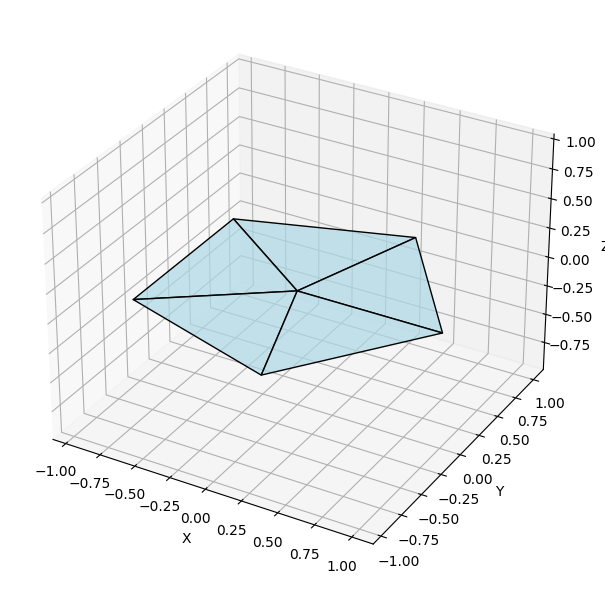

In [10]:
# Load the VTP file
filename = 'initial mesh.vtp'  
mesh = pv.read(filename)

# Extract points and faces
points = mesh.points
faces = mesh.faces.reshape(-1, 4)[:, 1:]  # Assumes triangular faces

# Create a matplotlib plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create a Poly3DCollection
poly3d = [[points[idx] for idx in face] for face in faces]
collection = Poly3DCollection(poly3d, facecolor='lightblue', edgecolor='k', alpha=0.7)

ax.add_collection3d(collection)

# Auto scale to the mesh size
scale = points.flatten()
ax.auto_scale_xyz(scale, scale, scale)

# Set labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.tight_layout()
plt.show()


## Showing the vertices indexes

/home/ufba/miniconda3/envs/PYMEMB/lib/python3.8/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ufba/miniconda3/envs/PYMEMB/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


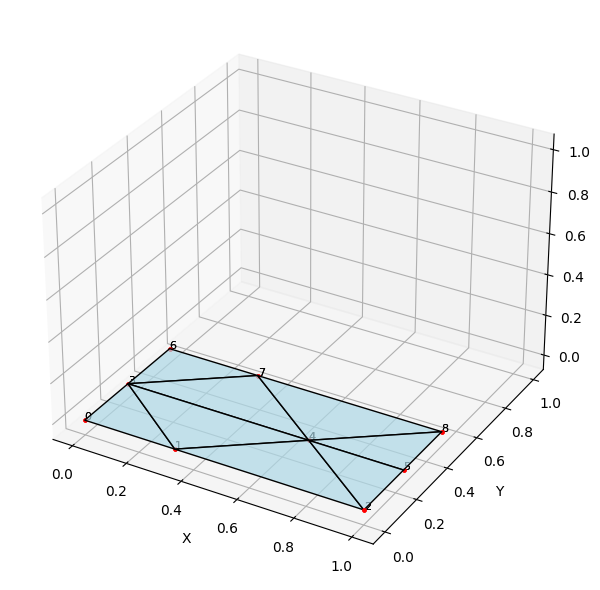

In [9]:
# Load the VTP file
filename = 'initial mesh.vtp'  
mesh = pv.read(filename)

# Extract points and faces
points = mesh.points
faces = mesh.faces.reshape(-1, 4)[:, 1:]  # Triangles only

# Create a matplotlib plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot triangles
poly3d = [[points[idx] for idx in face] for face in faces]
collection = Poly3DCollection(poly3d, facecolor='lightblue', edgecolor='k', alpha=0.7)
ax.add_collection3d(collection)

# Plot vertices as small spheres and index labels
for i, point in enumerate(points):
    ax.scatter(*point, color='red', s=5)
    ax.text(*point, f"{i}", fontsize=8, color='black')

'''
# Auto scale to the mesh size
max_range = (points.max(axis=0) - points.min(axis=0)).max()
mid = points.mean(axis=0)
ax.set_xlim(mid[0] - max_range/2, mid[0] + max_range/2)
ax.set_ylim(mid[1] - max_range/2, mid[1] + max_range/2)
ax.set_zlim(mid[2] - max_range/2, mid[2] + max_range/2)
'''

# Plot vertices as small spheres and index labels
for i, point in enumerate(points):
    ax.scatter(*point, color='red', s=5)
    ax.text(*point, f"{i}", fontsize=8, color='black')

# Escala original preservada
scale = points.flatten()
ax.auto_scale_xyz(scale, scale, scale)


# Set labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.tight_layout()
plt.show()

# Evolver

In [10]:
#add the evolver class where the potentials and integrators are added
evolver = mb.Evolver(system)


#add the potentials in this case we will add bending and stretching
# stretching
k = str(100.0)  # constante elásticas
l0 = str(1.0) # tamanho do pentágono
evolver.add_force("Mesh>Harmonic", {"k":{"0":k},
                                    "l0":{"0":l0}})

# limit potential
lmin = str(0.7)
lmax = str(1.3) 
evolver.add_force("Mesh>Limit", {"lmin":{"0":lmin},
                                "lmax":{"0":lmax}})
# bending potential
kappa = str(1.0) #rigidez de flexão
evolver.add_force("Mesh>Bending>Dihedral", {"kappa":{"0":kappa}})

In [11]:

#Print the loaded forces
pprint(evolver.get_force_info())


[{'kappa': '1 1 1 1 1 1 1 1 1 1 ',
  'name': 'Dihedral',
  'theta0': '3.14159 3.14159 3.14159 3.14159 3.14159 3.14159 3.14159 3.14159 '
            '3.14159 3.14159 ',
  'type': 'edge'},
 {'k': '100 0 0 0 0 0 0 0 0 0 ',
  'l0': '1 1 1 1 1 1 1 1 1 1 ',
  'name': 'Harmonic',
  'type': 'edge'},
 {'lmax': '1.3 100 100 100 100 100 100 100 100 100 ',
  'lmin': '0.7 0 0 0 0 0 0 0 0 0 ',
  'name': 'Limit',
  'type': 'edge'}]


In [12]:
# vertex move:
# first we need to know the edge length to move it appropriate:
compute = system.compute
edge_lengths = compute.edge_lengths()
avg_edge_length= np.mean(edge_lengths)
print("[Initial] avg_edge_length = ", avg_edge_length)


[Initial] avg_edge_length =  0.406250035976998


In [33]:
edge_lengths

[2.978, 3.141414331157226, 1.0, 1.0, 2.978]

In [13]:
#add the monte carlo integrator
evolver.add_integrator("Mesh>MonteCarlo>vertex>move", {"dr":"0.008"})


In [14]:
## Compute the initial energy
mc_energy = snapshots*[None]
mc_energy[0] = 100.0*compute.energy(evolver)['edges']/system.Numedges
print("[Initial] energy = {} x 10^-2".format(mc_energy[0]))

[Initial] energy = 1.0000000000000186e+17 x 10^-2


In [15]:
dump.vtk("pentagon_t0")
for snapshot in range(1, snapshots):
    for temperature in [1e-3, 1e-5, 1e-7, 0.0]: #using heating and cooling cycles
        evolver.set_global_temperature(str(temperature))
        evolver.evolveMC(steps=run_steps)
    dump.vtk("pentagon_t" + str(snapshot*run_steps)) # salva vários arquivos em cada estágio intermediário
    mc_energy[snapshot] =  100.0*compute.energy(evolver)['edges']/system.Numedges
    print("[{}] energy = {} x 10^-2".format(snapshot,  mc_energy[snapshot]))

dump.vtk('final_mesh')

[1] energy = 8.750000000000117e+16 x 10^-2
[2] energy = 5.6250000000000584e+16 x 10^-2
[3] energy = 1.8750000000000196e+16 x 10^-2
[4] energy = 22.936694093982407 x 10^-2
[5] energy = 0.11781290743468538 x 10^-2
[6] energy = 0.0013637647483689783 x 10^-2
[7] energy = 0.0004487655120414792 x 10^-2
[8] energy = 0.0008487871405974203 x 10^-2
[9] energy = 0.0017267761730240336 x 10^-2


In [16]:
edge_lengths = compute.edge_lengths()
avg_edge_length= np.mean(edge_lengths)
print("[Final] avg_edge_length = ", avg_edge_length)

energy = compute.energy(evolver)
print("[Final] energy = ", mc_energy[snapshots-1])

dump.txt("pentagon")

[Final] avg_edge_length =  0.9998890254373698
[Final] energy =  0.0017267761730240336


# Plotting

## Plotting final mesh

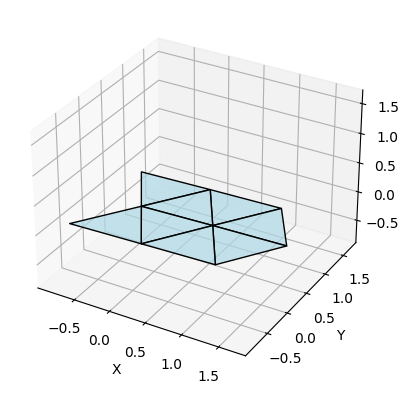

In [17]:
# Load the VTP file
filename = 'final_mesh.vtp'  
mesh = pv.read(filename)

# Extract points and faces
points = mesh.points
faces = mesh.faces.reshape(-1, 4)[:, 1:]  # Assumes triangular faces

# Create a matplotlib plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a Poly3DCollection
poly3d = [[points[idx] for idx in face] for face in faces]
collection = Poly3DCollection(poly3d, facecolor='lightblue', edgecolor='k', alpha=0.7)

ax.add_collection3d(collection)

# Auto scale to the mesh size
scale = points.flatten()
ax.auto_scale_xyz(scale, scale, scale)

# Set labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

#plt.tight_layout()
plt.show()


## Plotting Energy/NumEdges

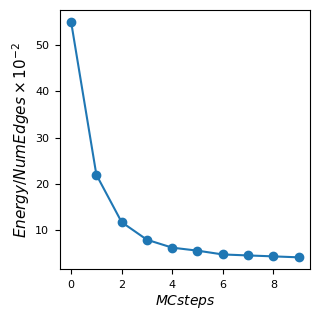

In [21]:
fig, ax = plt.subplots(figsize=(3.3,3.3))
ax.plot(mc_energy, 'o-')
ax.set_xlabel(r"$MC steps$", fontsize=10, labelpad = 2.5)
ax.set_ylabel(r"$Energy/NumEdges \times 10^{-2}$", fontsize=11, labelpad = 2.5)
ax.tick_params(axis='x', labelsize=8, pad = 4)
ax.tick_params(axis='y', labelsize=8, pad = 4)
ax.ticklabel_format(useMathText=True)
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.tight_layout()
plt.savefig("energy.svg", dpi=400)

Plot final mesh

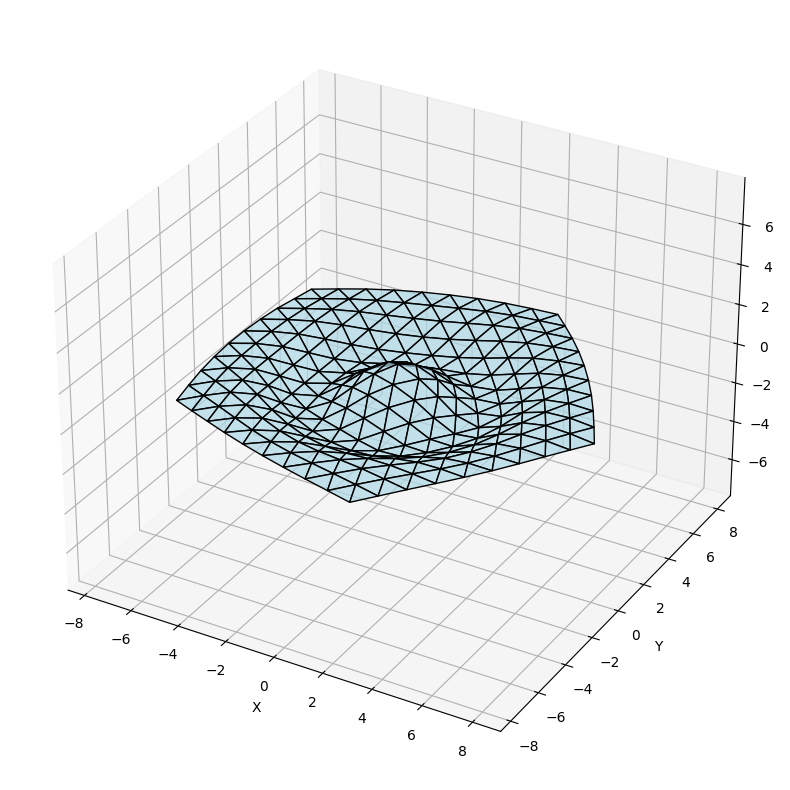

In [22]:
# Load the VTP file
filename = 'final_mesh.vtp'  # Replace with your actual file path
mesh = pv.read(filename)

# Extract points and faces
points = mesh.points
faces = mesh.faces.reshape(-1, 4)[:, 1:]  # Assumes triangular faces

# Create a matplotlib plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a Poly3DCollection
poly3d = [[points[idx] for idx in face] for face in faces]
collection = Poly3DCollection(poly3d, facecolor='lightblue', edgecolor='k', alpha=0.7)

ax.add_collection3d(collection)

# Auto scale to the mesh size
scale = points.flatten()
ax.auto_scale_xyz(scale, scale, scale)

# Set labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.tight_layout()
plt.show()